In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import random

class Array:

    def __init__(self, size_x : int = None, size_y : int = None, data : list[list] | None = None) -> None:
        if not data:
            if not isinstance(size_x, int):
                raise TypeError(f"Expectected int type, got {type(size_x)} instead")
            if not isinstance(size_y, int):
                raise TypeError(f"Expectected int type, got {type(size_y)} instead")
        self.size_x = size_x
        self.size_y = size_y
        if size_x is None and size_y is None and data:
            self.data = data
            self.size_x = len(data)
            self.size_y = len(data[0])
        elif size_x == 0 or self.size_y == 0:
            self.data = [[]]
        elif data:
            if isinstance(data, list) and isinstance(data[0], list):
                if len(data) != size_x or len(data[0]) != size_y:
                    raise ValueError("Given sizes do not match data sizes")
                self.data = data
            else: raise TypeError("Unsupported data type")
        else:
            self.data = [[0 for j in range(size_y)] for i in range(size_x)]


    def __getitem__(self, i) -> list:
        return self.data[i]


    def __neg__(self) -> object:
        for i in range(self.size_x):
            for j in range(self.size_y):
                self[i][j] = -self[i][j]

        return self


    def len_x(self) -> int:
        return self.size_x


    def len_y(self) -> int:
        return self.size_y


    def resize(self, new_x : int, new_y : int) -> object:
        if(new_x < self.size_x) or (new_y < self.size_y):
            raise TypeError(
                f"Can't resize 2D array sized {self.size_x}x{self.size_y} to {new_x}x{new_y}")
        for i in self.data:
            for _ in range(new_y - self.size_y):
                i.append(0)

        for _ in range(new_x):
            self.data.append([0 for i in range(new_y)])

        self.size_x = new_x
        self.size_y = new_y

        return self


    def __eq__(self, __value: object) -> bool:
        return self.data == __value.data


    def __add__(self, __value : object | float) -> object:
        if isinstance(__value, float):
            for i in range(self.size_x):
                for j in range(self.size_y):
                    self.data[i][j] += __value
            return self
        if type(self) != type(__value):
            raise TypeError(f"Can't add a 2D array to {type(__value)}")
        if (self.size_x != __value.size_x) or (self.size_y != __value.size_y):
            raise ValueError("2D arrays have diffirent size")

        for i in range(self.size_x):
            for j in range(self.size_y):
                self.data[i][j] += __value[i][j]

        return self


    def __sub__(self, __value : object | float) -> object:
        if isinstance(__value, float):
            for i in range(self.size_x):
                for j in range(self.size_y):
                    self.data[i][j] -= __value
            return self
        if type(self) != type(__value):
            raise TypeError(f"Can't subtract {type(__value)} with 2D array")
        if (self.size_x != __value.size_x) or (self.size_y != __value.size_y):
            raise ValueError("2D arrays have diffirent size")

        for i in range(self.size_x):
            for j in range(self.size_y):
                self.data[i][j] -= __value[i][j]

        return self

    def div_(self, __value : int) -> object:
        for i in range(self.size_x):
            for j in range(self.size_y):
                self[i][j] = __value / self[i][j]
        return self

    def __str__(self) -> str:
        s = ""
        for i in range(self.size_x):
            for j in range(self.size_y):
                s += f"{self[i][j]} "
                if j == self.size_y - 1 and i != self.size_x - 1:
                    s += "\n"
        return s

    def random_data(self, _min=0, _max=20) -> object:
        for i in range(self.size_x):
            for j in range(self.size_y):
                self.data[i][j] = random.randint(_min, _max)

        return self


    def abs_(self) -> object:
        for i in range(self.size_x):
            for j in range(self.size_y):
                self[i][j] = abs(self[i][j])

        return self

    def sum_(self) -> float:
        s = 0
        for i in range(self.size_x):
            for j in range(self.size_y):
                s += self[i][j]

        return s

    def transpose(self) -> object:
        new_x = self.size_y
        new_y = self.size_x

        new_list = Array(new_x, new_y)
        for i in range(new_x):
            for j in range(new_y):
                new_list.data[i][j] = self.data[j][i]

        return new_list


    def det(self) -> int:
        if self.size_x != self.size_y:
            raise ValueError(
                f"Can't count the determinant for 2D array sized {self.size_x}x{self.size_y}")
        swaps = 0
        det = 1

        for i in range(self.size_x):
            if self[i][i] == 0:
                id = i + 1
                while (id < self.size_x) and (self[id][i] == 0):
                    id += 1
                if id == self.size_x:
                    return 0
                swaps += 1
                self.data[id], self.data[i] = self[i], self[id]
            det *= self[i][i]
            inverse = 1 / self[i][i]
            for j in range(i, self.size_x):
                self[i][j] *= inverse
            for next in range(i + 1, self.size_x):
                ratio = self[next][i]
                for j in range(i, self.size_x):
                    self[next][j] -= self[i][j] * ratio

        return det if swaps % 2 == 0 else -det


    def reverse(self):
        det = self.det()
        if self.size_x == 2:
            return Array(2, 2, [[self[1][1] / det, -self[0][1] / det],
                                [-self[1][0] / det, self[0][0] / det]])


    def __truediv__(self, __value : float | object) -> object:
        if isinstance(__value, float):
            for i in range(self.size_x):
                for j in range(self.size_y):
                    self[i][j] /= __value

            return self
        elif type(__value) == type(self):
            result = Array(self.size_x, self.size_y)
            for i in range(result.size_x):
                result[i][i] = 1
            for i in range(__value.size_x):
                leading = __value[i][i]
                if leading == 0:
                    for j in range(__value.size_y):
                        __value[i][j] += 1
                        result[i][j] += 1
                if leading != 1:
                    for j in range(__value.size_y):
                        __value[i][j] /= leading
                        result[i][j] /= leading

                for k in range(__value.size_x):
                    if k != i:
                        ratio = __value[k][i]
                        for j in range(__value.size_y):
                            __value[k][j] -= ratio * __value[i][j]
                            result[k][j] -= ratio * result[i][j]

            return result * self
        else:
            raise TypeError("Only can divivde 2D array by int or 2D array")


    def _append(self, __value : list) -> object:
        new_list = Array(self.size_x, self.size_y)
        new_list.data = self.data.copy()

        if not isinstance(__value, list):
            raise TypeError(f"Expected a list, got {type(__value)} instead")
        if len(__value) != new_list.size_y:
            raise ValueError("Can't add a list to an array as they have different lenght")

        new_list.data.append(__value)
        new_list.size_x += 1

        return new_list


    def mean(self, option : int | None =None) -> float | object:
        if option is None:
            lenght = self.size_x * self.size_y
            s = 0
            for i in range(self.size_x):
                s += sum(self[i][j] for j in range(self.size_y))
            return s / lenght

        if option == 0:
            result = Array(1, self.size_y)
            for j in range(self.size_y):
                result[-1][j] = sum(self[i][j] for i in range(self.size_x)) / self.size_x
            return result

        if option == 1:
            result = Array(1, self.size_x)
            for j in range(self.size_x):
                result[-1][j] = sum(self[j][i] for i in range(self.size_y)) / self.size_y
            return result.transpose()


    def __mul__(self, __value : float | object) -> object:
        if isinstance(__value, float):
            for i in range(self.size_x):
                for j in range(self.size_y):
                    self.data[i][j] *= __value
            return self
        if type(__value) == type(self):
            if self.size_y != __value.size_x:
                raise ValueError(
                    f"Can't multiply 2D array sized {self.size_x}x{self.size_y} with 2D array sized {__value.size_x}x{__value.size_y}")
            result = Array(self.size_x, __value.size_y)
            for i in range(result.size_x):
                for j in range(result.size_y):
                    result.data[i][j] = sum(self[i][k] * __value[k][j]
                                            for k in range(__value.size_x))
            return result
        raise TypeError("Only can multiply 2D array with int or 2D array")


    def __pow__(self, n : int) -> object:
        for _ in range(n - 1):
            self *= self
        return self



    def pow_(self, __value : int) -> object:
        for i in range(self.size_x):
            for j in range(self.size_y):
                self[i][j] **= __value

        return self


    def unique(self, coloum : int):
        if not isinstance(coloum, int):
            raise TypeError("A coloum index can only be int")
        if coloum > self.size_y or coloum < 0:
            raise ValueError("Given coloum number doesn't exit in 2D array")
        unique = set()
        for i in range(self.size_x):
            unique.add(self[i][coloum])

        return unique


    def select_rows(self, indices : list) -> object:
        selected_data = [self[i] for i in indices]

        return Array(data=selected_data)


    def select_columns(self, indices: list) -> object:
        selected_data = [[row[i] for i in indices] for row in self.data]

        return Array(data=selected_data)


    def delete(self, index : int) -> object:
      self.data = self.data[:index - 1] + self.data[:index]
      return Array(data=self.data)


#a = Array(1, 2, [[2, 2]])

In [3]:
import math


class Distance_functions:

    @staticmethod
    def euclidian_distance(a, b) -> float:
        s = 0
        for i, x in enumerate(a):
            s += (x - b[i]) ** 2
        return s


class Kernel_functions:


    @staticmethod
    def gaussinan_kernel(x : float) -> float:
        return math.exp(-x * x * 2) * ((math.pi * 2) ** -1)

    @staticmethod
    def biquadratic_kernel(x : float) -> float:
        return 0 if abs(x) > 1 else (15 * (1 - x * x ) ** 2) / 16

    @staticmethod
    def epanechnikov_kernel(x : float) -> float:
        return 0 if abs(x) > 1 else (3 * (1 - x * x) ** 2) / 4



class Knn_base:

    def __init__(self, k : int) -> None:
        self.k = k
        self.data = None


class Knn(Knn_base):

    def __init__(self, k : int) -> None:
        super().__init__(k)


    def fit(self, data : object) -> None:
        self.data = data


    def get_nn(self, point : list, dist_function) -> list:
        distances = []
        for row in self.data:
            distances.append((dist_function(row[:-1], point), row))
        distances.sort(key=lambda x: x[0])
        n = min(self.k, self.data.size_x)
        return [distances[i][1] for i in range(n)]


    def predict(self, point : list, dist_function=Distance_functions.euclidian_distance, return_predictions : bool = False) -> int:
        label_dict = {}
        labels_set = set(self.data.transpose()[-1])
        neigbours = self.get_nn(point, dist_function)
        predictions = [row[-1] for row in neigbours]
        for i in labels_set:
            label_dict[i] = 0

        for i in predictions:
            label_dict[i] += 1

        return max(label_dict, key=lambda x : label_dict[x]), label_dict if return_predictions else max(label_dict, key=lambda x : label_dict[x])


    def error_rate(self) -> float:
        errors = 0
        for i in range(self.data.size_x):
            if self.predict(self.data[:-1]) != self.data[-1]:
                errors += 1

        return errors

In [4]:
class Parzen_window_adaptive(Knn_base):

    def __init__(self, k : int) -> None:
        super().__init__(k)


    def fit(self, data : object) -> None:
        self.data = data


    def get_nn(self, point : list, dist_function) -> list:
        distances = []
        for row in self.data:
            distances.append((dist_function(row[:-1], point), row))
        distances.sort(key=lambda x: x[0])

        return distances[:self.k + 1]


    def predict(self, point : list,
                kernel = Kernel_functions.gaussinan_kernel,
                dist_function = Distance_functions.euclidian_distance, return_predictions : bool = False):
        label_dict = {}
        labels_set = set(self.data.transpose()[-1])
        a = self.get_nn(point, dist_function)
        b = a[-1]
        a = a[:-1]
        distances = [i[0] for i in a]
        neigbours = [i[1] for i in a]
        predictions = [row[-1] for row in neigbours]
        for i in labels_set:
            label_dict[i] = 0

        for i in range(len(predictions)):
            label_dict[predictions[i]] += kernel(distances[i] / (b[0] + 1e-20))

        return max(label_dict, key=lambda x : label_dict[x]), label_dict if return_predictions else max(label_dict, key=lambda x : label_dict[x])


    def error_rate(self) -> float:
        errors = 0
        for i in range(self.data.size_x):
            if self.predict(self.data[i][:-1])[0] != self.data[i][-1]:
                errors += 1

        return errors

In [13]:
class STOLP:

    def __init__(self, data : list) -> None:
        self.data = data
        self.classifier = None
        self.outlier_trashhold = None
        self.result = None


    @staticmethod
    def __count_margin(predictions : dict, label : int) -> float:
        correct, incorrrect = 0, 0
        for i in predictions:
            if i == label:
                correct += predictions[i]
            else:
                incorrrect += predictions[i]

        return correct - incorrrect



    def fit(self, model : object, outlier_trashhold : float = None, eps : float = 3) -> None:
        self.classifier = model
        self.outlier_trashhold = outlier_trashhold if outlier_trashhold is not None else -(self.classifier.k / 10)
        n = len(data)
        margin = [(i, self.__count_margin(model.predict(self.data[i][:-1], return_predictions=True)[1], self.data[i][-1]), self.data[i][-1]) for i in range(len(self.data))]
        margin.sort(key=lambda x: -x[1])
        print(margin)
        label_set = set([0, 1, 2])
        self.result = [[] for _ in range(len(label_set))]
        #return margin
        for i in margin:
          if len(self.result[i[2]]) == 0:
                self.result[i[2]].append(self.data[i[0]])
                del(self.data[i[0]])
        print(self.result)
        #return Array(data=self.result[0] + self.result[1] + self.result[2]), model.error_rate()
        incorrect = n + 1
        while incorrect > eps:
            incorrect = 0
            model.fit(Array(data=self.result[0] + self.result[1] + self.result[2]))
            margin = [(i, self.__count_margin(model.predict(self.data[i][:-1], return_predictions=True)[1], self.data[i][-1]), self.data[i][-1]) for i in range(len(self.data))]
            margin.sort(key=lambda x: x[1])
            print(margin)
            '''used_classes = set()
            while len(used_classes) != 3:
                for score in margin:
                  if score[2] not in used_classes:
                    used_classes.add(score[2])
                    self.result[score[2]].append(self.data[score[0]])
                    del(self.data[score[0]])'''
            score = margin[0]
            self.result[score[2]].append(self.data[score[0]])
            del(self.data[score[0]])
            for i in range(len(self.data)):
                if model.predict(self.data[i][:-1])[0] != self.data[i][-1]:
                    incorrect += 1

        return self.result[0] + self.result[1] + self.result[2], self.data


    def get_data(self) -> list:
        return self.result


    def get_data_characteristic(self, model : object, outlier_trashhold : float = None) -> list:
        self.classifier = model
        self.outlier_trashhold = outlier_trashhold if outlier_trashhold is not None else -(self.classifier.k / 10)
        n = len(self.data)
        margin = [(i, self.__count_margin(model.predict(self.data[i][:-1], return_predictions=True)[1], self.data[i][-1])) for i in range(len(self.data))]

        result = []
        for score in margin:
          if score[1] < self.outlier_trashhold:
            result.append("outlier object")
            print(self.data[score[0]])
          elif score[1] < -0.02:
            result.append("mistakenly classified object")
          elif score[1] < 0.25:
            result.append("border object")
          elif score[1] < 0.8:
            result.append("non-informational object")
          else:
            result.append("best object")

        return result, margin


# Идея алгоритма
Будем считать **отступ $ M$** объекта $x_i$  по формуле: \\
$$ M(x_i) = ∑_{i}^{k} w_i  [y = a(x_i)] - ∑_{i}^{k} w_i  [y \ne a(x_i)]$$
Так как мы строим предсказание в виде:
$$ a(x_i) = arg \max_{y_i \in Y} \sum_{i}^{k} w_i [y^{(i)} = y] $$
по сути говоря путем голосования, то $ M(x_i)$ равнен разности счёта($score$) для класса, к которому принадлежит объект, с счётом других классов. \\
Рассмотрим сначала обычный Knn. У нас есть некоторые ситуации:

1. Если $ M(x_i)$ большой(очень близкий к $k$), значит вокруг $x_i$ много объектов с его классов, и алгоритм точно уверен в метке. Такие обьекты называются **эталонным**.
2. Если $ M(x_i)$ средний(где-то между 1 и $k - const$), объект называется **неинформативным**. Мы предсказали объект правильно, но среди $k$ его соседей есть другие классы, так что большой ценности он нам не несет.
3. Если $ M(x_i)$ близок к нулю, объект называется **пограничным**. Очевидно, что такие объекты лежат на границе класвов.
4. Если $ M(x_i) \lt 1$, то мы не правильно классифиировали объект, что вполне возможно, если мы взяли слишком мало или наоборот слишком много соседей. Такой объект называется **ошибочным**.
5. Если $ M(x_i)$ близок к $k$, объект называется **выбросом**. И тут предельно очевидно, что если вокрут обьекта с классом $s$ не существуют или практически не существуютобъекты того же класса, то $x_i$ явно должен быть не тут. \\




А теперь к сути. Когда мы используем алгоритмы, основанные на близости точки к известным, нам нужно хранить всю выборку(возможно только исключая выборсы). Так как мы неизбежно используем сортировку, кроме того, мы еще ищем соседей. В итоге мы получаем сложность $O(n^2)$. Конечно, есть способы оптимизировать поиск соседей - построить **$k$-размерное дерево, приближенное дерево, граф близости и т.д.** Но из информации выше можно сделать другой вывод.
# STOLP
Будем уеньшать размер выборки $X^l$ так, чтобы получить выборку $X^m, m \lt l$, такую что предсказания алгоритма $a$ будут одинаковыми на разных выборках.


1. Посчитаем отступ $M(x_i) ∀ x_i \in X^l$
2. Удалим выбросы из $X^l$
3. Добавим к новой выборке $X^m$ по одному объекту из каждого класса с наименьшим отступом, а из $X^l$ - удалим.
4. Теперь будем строить предсказания объектов оставшихся в $X^l$ на объектах ихи $X^m$
5. Пока мы будем ошибаться $ > const$ раз: посчитаем новый отступ $M(x_i) ∀ x_i \in X^l$, объекты с худшим отступом добавим в $X^m$, вновь построим предсказания.






In [6]:
data = sns.load_dataset('iris')

In [7]:
encode = {'setosa' : 0, 'versicolor' : 1, 'virginica' : 2}
data = data.replace({'species' : encode})
data = data.drop(['sepal_length', 'sepal_width'], axis = 1)

In [8]:
transform, head = [], []
for i in data:
  head.append(i)
  transform.append(data[i].to_list())

In [9]:
transformed_data = Array(data=transform)
transformed_data = transformed_data.transpose()
test_data = [*transformed_data]

In [14]:
model = Parzen_window_adaptive(6)
model.fit(transformed_data)

In [15]:
optimizer = STOLP(data=test_data)

Будем использовать метод адаптивного Парзеновского окна, а почему нет? Обычный Knn большого смысла использовать нет, $M$ получается целым, к тому же невариативным, еще и если использовать 6 соседей, то почти у всех точек будет отступ 6, в итоге мы не сможем нормально разделить объекты на эталонные и не информативные.

In [ ]:
margin_score = optimizer.get_data_characteristic(model=model, outlier_trashhold= -0.14)[1]
margin_score.sort(key=lambda x: x[1])
number = range(1, 151)
score = [i for _, i in margin_score]

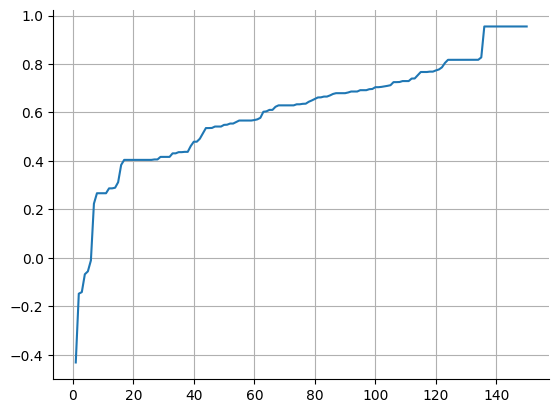

In [ ]:
plt.plot(number, score)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.grid(1)
plt.show()

По полученным данным мы можем выбрать границы отступа $M$ и изменить их в методе класса.

In [ ]:
result, margin = optimizer.get_data_characteristic(model=model, outlier_trashhold= -0.14)
count = {}
for i in result:
    if i not in count:
        count[i] = 1
    else:
        count[i] += 1

In [ ]:
sorted(margin, key=lambda x: x[1])

In [ ]:
print(count)

{'best object': 28, 'non-informational object': 115, 'outlier object': 3, 'mistakenly classified object': 2, 'border object': 2}


Мы получили 3 выброса и 2 ошибочно классифицированных объекта, что на самом деле правильно, ведь наибольшая точность метода была 0.9(6).

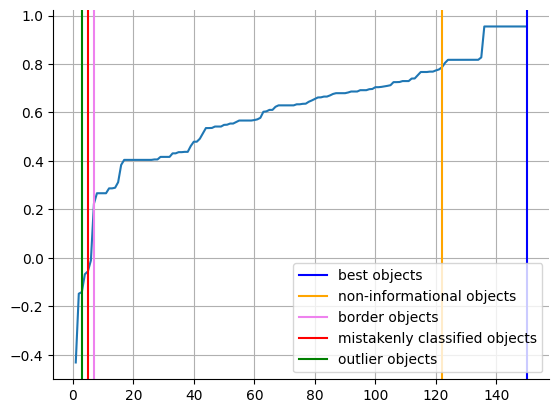

In [ ]:
plt.plot(number, score)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axvline(150, color='blue', label="best objects")
plt.axvline(count["outlier object"] + count["mistakenly classified object"] + count["border object"] + count["non-informational object"], color='orange', label="non-informational objects")
plt.axvline(count["outlier object"] + count["mistakenly classified object"] + count["border object"], color='violet', label="border objects")
plt.axvline(count["outlier object"] + count["mistakenly classified object"], color='red', label="mistakenly classified objects")
plt.axvline(count["outlier object"], color='green', label="outlier objects")
plt.legend(loc='lower right')


plt.grid(1)
plt.show()

Как видно, мы получили группы 1.-5.(справа налево)

In [ ]:
stolp_result = pd.DataFrame(data={"petal_length" : data["petal_length"], "petal_width" : data["petal_width"], "mark" : optimizer.get_data_characteristic(model=model, outlier_trashhold= -0.14)[0]})

<Axes: xlabel='petal_length', ylabel='petal_width'>

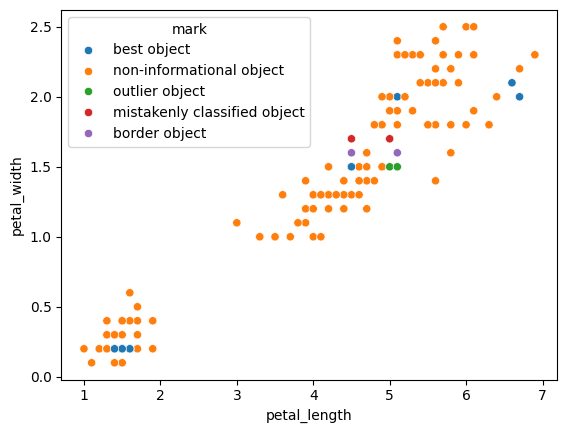

In [ ]:
sns.scatterplot(x=stolp_result["petal_length"], y=stolp_result["petal_width"], hue=stolp_result["mark"])

*Scatterplot* в очередной раз работает очень интересно, он не показывает всех лучших объектов, когда их на самом деле в 2 раза больше. Но в целом все выглядит логично, лучшие объекты находятся где-то в центрах или на краях классов, объекты на границе находятся(wow) на границе двух классов, там же и выбросы, и ошибки. Понятно, что для любого метода, использующего близость точки к другим, будет очень сложно разделять объекты на границе классов, которые еще к тому же перемешаны между собой.

In [17]:
optimizer = STOLP(data=test_data)
a, mist = optimizer.fit(model, eps=1)

[(56, 0.3610932720388468, 1), (73, 0.3610932720388468, 1), (75, 0.35575356072475806, 1), (74, 0.3318435370820724, 1), (60, 0.30341922878018, 1), (65, 0.3013771258277761, 1), (53, 0.28705782431228655, 1), (84, 0.28705782431228655, 1), (76, 0.28255829096450386, 1), (58, 0.23927559963608555, 1), (81, 0.2334322925338203, 1), (69, 0.22969457810446248, 1), (88, 0.22969457810446248, 1), (79, 0.2293238220639704, 1), (86, 0.22669153425560548, 1), (85, 0.2231984415407523, 1), (87, 0.2231984415407523, 1), (63, 0.21941872322445455, 1), (89, 0.21740455277525975, 1), (49, 0.21285773749013856, 1), (66, 0.21285773749013856, 1), (80, 0.21285773749013856, 1), (61, 0.21272842177350648, 1), (70, 0.21272842177350648, 1), (83, 0.2085290906902341, 1), (51, 0.20240211728420557, 1), (57, 0.20101827542198492, 1), (55, 0.20019297137383335, 1), (48, 0.12183914441042634, 1), (62, 0.12183914441042634, 1), (64, 0.12183914441042634, 1), (72, 0.12183914441042634, 1), (77, 0.12183914441042634, 1), (109, 0.1210711639485

In [18]:
result = Array(data=a)

In [19]:
print(result.size_x)

9


Удивительный факт, нам хватает всего 16(!) точек. Хотя нам еще предстоит это проверить далее.

In [20]:
x = result.transpose()[0]
y = result.transpose()[1]
classes = result.transpose()[2]

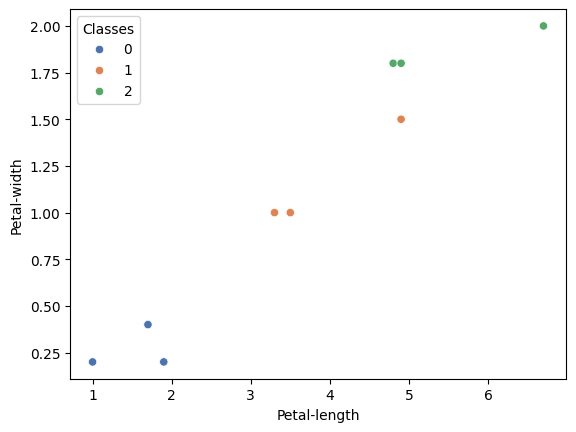

In [21]:
df = pd.DataFrame(data={'Petal-length' : x, 'Petal-width' : y, 'Classes' : classes})
sns.scatterplot(data=df, x='Petal-length', y='Petal-width', hue='Classes', palette="deep")
plt.show()

In [22]:
model1 = Parzen_window_adaptive(6)
model1.fit(result)

In [10]:
model2 = Parzen_window_adaptive(6)
model2.fit(transformed_data)

In [ ]:
num_correct_predicts = 0
for i in transformed_data:
    if model1.predict(i[:-1])[0] == i[-1]:
      num_correct_predicts += 1
    else:
      print(i)
      print(model1.predict(i[:-1])[0])

In [24]:
print(num_correct_predicts)

144


In [ ]:
num_correct_predicts = 0
for i in transformed_data:
    if model2.predict(i[:-1])[0] == i[-1]:
      num_correct_predicts += 1
    else:
      print(i)
      print(model2.predict(i[:-1])[0])

In [26]:
print(num_correct_predicts)

144


В итоге, модель, использующая для предсказаний выборку после применения **STOLP** совершила на одну ошибку меньше. Вообще говоря, это не такая большая проблема, ведь остальные ошибки полностью совпали, а это самое главное. Так произошло потому что в исходном датасете её окружало больше точек другого класса, а в полученном после STOLP нет. \\
Таким образом, мы уменьшили выборку практически в 9 раз, при этом сохранили(почти) исходную точность. В любом ином случае, алгоритм был бы бесполезеным.